# 1. **Mejorar Precisión del Modelo con Preprocesamiento de Datos**

  + Deber procesar sus datos sin procesar antes de modelar su problema. La preparación de los datos puede depender de los datos que tenga disponibles y los algoritmos de ML que desee usar.

  + El objetvo de procesar los datos es obtner una mejor precisión del modelo. 

  + **Hay 3 tipos de procesamiento de datos**

    + Agregar variables a los datos

    + Eliminar variables a los datos

    + Transformar variables a los datos

**Agregar variables al dataset**

 + Los modelos avanzados pueden extrae relaciones de variables complejas, aunque algunos modelos requieren que esas relaciones se expliquen claramente. Derivar nuevas variables de los datos de entrenamiento para incluirlos en el proceso de modelado puede darle un impulso en el rendimiento del modelo.

+ **Variables ficticias (dummy)**: las variables categóricas pueden convertirse en variabes n-binarios, donde n es el número de categorias o niveles que tiene la variable. Estas variables descompuestas/desnormalizadas se conocen como variables ficticias

+ **Variables transformadas**: Se puede agregar una variación transformada de una variable al conjunto de datos para permitir que un método lineal explore posibles relaciones lineales o no lineales entre variables. Algunas transformaciones son el logaritmo, el cuadrado y la raíz cuadrada.

+ **Datos faltantes**: Las variables con datos faltantes pueden tener esos datos faltantes imputados usando un método confiable como el k-vecinos más cercanos.


**Eliminar variables del dataset**

Algunos métodos funcionan mal con variables redundaantes o duplicadas. Se puede incrementar la precisión del modelo eliminando variables del dataset.

  + **Proyección**: Los datos de entrenamiento se puden proyectar en espacios de menor dimensión, pero aún smantienen las relaciones inherentes en los datos. Un enfoque popular es el análisis de componentes principales (PCA), donde los componentes principales encontrados por el método pueden tomarse como un conjunto reducido de variables de esntrada.

  + **Señal espacial**: Una proyección de señal espacial de los datos transformará los datos en la superficie de una esfera multidimensional. Los resultados se pueden utilizar para resaltar la existencia de valores atípicos que se pueden modificar o eliminar los datos.

  + **Variables correlacionadas**: Algunos algoritmos pierden importancia con la existencia de variables altamente correlacionadas. Las variables por pares con alta correlación se pueden identificar y las variables más correlacionadas se pueden eliminar de los datos.

**Transfomar variables de un dataset**

La transformación de los datos de entrenamiento pueden reducir la asimetría de los datos, así como la prominencia de los valores atípicos. Muchos modelos estan a la espera de que los datos que se vayan a introducir esten transformados antes de aplicar el logaritmo.

 + **Centrado**: Transformación de los datos para que tengan una media = 0 y una SD  = 1. Estandariazción de datos

 + **Escalado**: Una transformación de escalado estándar consiste en asignar a los datos originales una escala entre [0,1]. Normalización de datos.

+ **Eliminar sesgo**: Los datos sesgados empujan la distribución hacia un lado en lugar de seguir una distribución normal. Algunos modelos asumen datos con distribución normal y puede funcionar mejor si se elimina el sesgo. Intentar eliminar el sesgo a partir del logaritmo, la raíz cuadrada o el inverso de valores.

+ **BOX-COX**: Una transformación Box-Cox para ajustar los datos eliminando el sesgo.

+ **Binning**: Los datos numéricos se pueden hacer discretos agrupando valores en bins. Esto de denomina discretización de datos. Este proceso se puede realizar de forma manual, aunque es más asconsejable realizarlo de forma sistemática y automática.



# 2. **Variables Dummy**

Si eres científico de datos tratas de cuantificar toda tu vida con números, es por eso que cuando vemos un conjunto de datos con variables cualitativas, mi mente piense en cauntificarlas.**Hay una función que ayuda a hacer eso**

Con pandas y scikit learn se puede conquistar el mundo. **Pandas** tiene una función para convertir una variable categórica a una serie de 0 y 1, haciendo más fácil cuantificar y comparar.




In [ ]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar los datos desde una pàgina web

df = pd.read_csv('https://data.princeton.edu/wws509/datasets/salary.dat', delim_whitespace=True )
df_2 = df.copy()
df.head()

,sx,rk,yr,dg,yd,sl
0,male,full,25,doctorate,35,36350
1,male,full,13,doctorate,22,35350
2,male,full,10,doctorate,23,28200
3,female,full,7,doctorate,27,26775
4,male,full,19,masters,30,33696


sx= sexo, rk = rango, yr = año en el rango actual, dg= grado, yd = años desde que obtuvo el grado más alto, sl = salario

In [ ]:
df['sx'].unique()

array(['male', 'female'], dtype=object)

Dado que la variable 'sx' tiene dos categorias (masculio o femenino) la función **'pd.get_dummues'** crea un nuevo marco de datos que consta de 0 y 1. El dataframe tendrá un 1 dependiendo del sexo en este caso.

In [ ]:
# Convertir la columna sexo en dummy

dummy_variable = pd.get_dummies(df['sx'])
dummy_variable.head()

,female,male
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


Hasta ahora hemos creado un marco de datos completamente nuevo solo de dummies, para compararlo con nuestro marco de datos original, necesitaremos fusionarlos o concatenarlos para que funcionen correctamente. 

  + Al crear variables ficticas, creamos nuevas columnas para nuesto conjunto de datos original. El dataset antiguo y nuevo no tienen nada en común por lo que hay que concatenarlos.

In [ ]:
# declaro primero el dataframe antiguo y luego el nuevo. Se puede cambiar

df = pd.concat([df, dummy_variable], axis = 1)
df.head()

,sx,rk,yr,dg,yd,sl,female,male,female,male
0,male,full,25,doctorate,35,36350,0,1,0,1
1,male,full,13,doctorate,22,35350,0,1,0,1
2,male,full,10,doctorate,23,28200,0,1,0,1
3,female,full,7,doctorate,27,26775,1,0,1,0
4,male,full,19,masters,30,33696,0,1,0,1


In [ ]:
# O podemos fusionarlo con la función 'merge'

df = df_2.merge(dummy_variable, left_index=True, right_index= True)
df.head()

,sx,rk,yr,dg,yd,sl,female,male
0,male,full,25,doctorate,35,36350,0,1
1,male,full,13,doctorate,22,35350,0,1
2,male,full,10,doctorate,23,28200,0,1
3,female,full,7,doctorate,27,26775,1,0
4,male,full,19,masters,30,33696,0,1


# 3. **8 Formas de Mejorar la Precison de un Modelo de ML**

**Introducción**

A veces nos cuesta mejorar la precisión del modelo.

Un modelo predictivo se puede crear de muchas maneras, no hay un camino fijo a seguir. En este artículo se muestran las 8 formas con las que se puede crear un modelo sólido de ML. 


**Pasos a seguir**

El ciclo de desarrollo de un modelo pasa por la recopilación de datos hasta la construcción del modelo.

+ Antes de empezar a explorar los datos es importante pararse a pensar ¿cuál es la pregunta que estoy buscando de estos datos? ( la hipótesis). Es importante pensar en el probelma y adquirir conocimiento del dominio. 

+ La generación de hipótesis ayuda a tener la ideas claras de nuestros datos y construir mejores funciones eliminando el sesgo. 


1.- **Añade más datos**

+ Tener más datos ayuda a mejorar los resultados y la precisión del modelo. Los datos hablan por sí solos. 

2.- **Tratar los valores perdidos y atípicos**

+ La presencia de valores atípicos y faltantes en los datos reduce la precisión de un modelo y/o conduce a un modelo sesgado. Un modelo inexacto debido a que no analizamos correctamente el comportamiento y la relación con otras variables.

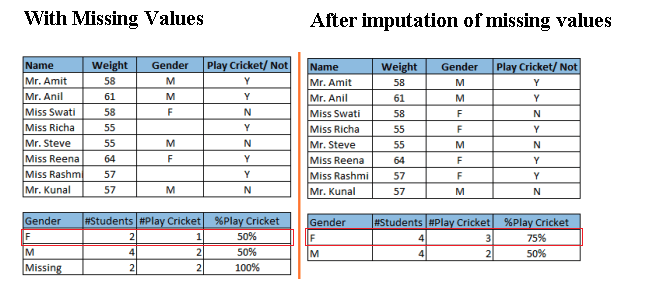

+ El dataset con datos faltantes nos dice que la probabilidad que las mujeres jueguen al criket es igual al de los hombre. Cuando hacemos la imputación de missings gracias al saludo del nombre (miss) vemos que las mujeres tienen mayor probabilidad de jugar al criket que los hombres.

+ **Faltantes** En el caso de variables continuas, puede imputar los valores faltantes con media, mediana, moda. Para las variables categóricas, puede tratar las variables como una clase separada. También puede usar un modelo para predecir los valores que faltan.

+ **Valor atípico** Puede eliminar las observaciones, realizar transformaciones, agrupar, imputar (igual que los valores perdidos)

3. **Ingeniería de variables (Feature Engineering**

+ Extrae información de los datos existentes. La nueva información se extrae en términos de nuevas variables. Estas variables tienen una mayor capadidad para explicar la variación en los datos de entrenamiento y proporciona una precisión del modelo mejorada.

+ La ingeniería de variables está muy influenciada por la generación de hipótesis. Una buena hipótesis da como resultado buenas variables, es por ello que hay que invertir tiempo en generación de hipótesis.

**Proceso de ingeníeria de variables**

  + **Transformación de variables** 
  Escenarios en los que se requiere la transformación de variables:
    - Cambiar la escala de una variable de la escala original a una escala entre [0,1]. Por ejemplo, si un conjunto de datos tiene la primera variables en metros, la segunda en cm y la tercera en km, antes de aplicar cualquier algoritmo debemos normalizar estas variables a la misma escala.

    - Hay algoritmos que funcionan mejor con datos normalmente distribuidos, por lo tanto debemos eliminar la asimetría de las variables. Existem métodos como algoritmo, raíz cuadrada o inversos de valores para eliminar la asimetria

   - Algunas veces la creación de bins de datos numéricos funcionan bien para manejar valores atípicos. 


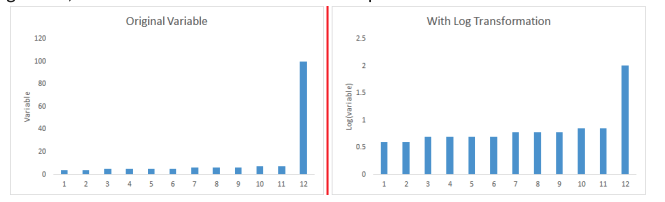

  + **Creación de variables** 

  + La derivación de nuevas variables a partir de variables existentes se conoce como creación de variables. Ayuda a eliminar la relación oculta un conjunto de datos. **EJEMPLO** Queremos predecir el número de transacciones en una tienda en función de las fechas de transacción. Las fechas de transacción pueden no tener una correlación directa con el número de transacciones, pero si observamos el dia de la semana, puede tener una correlación mayor. Aquí la información del dia de la semana esta oculta.

4. **Selección de variales**

+ La selección de variables es un proceso de encontrar el mejor subconjunto de variables que mejor expliquen la relación de las variables independientes con la variable objetivo.

**Puedes seleccionar las variables útiles en funcion de las siguientes métricas:**

  + **Conocimiento del dominio** Según el dominio escogemos las variables que mejor puedan explicar la variable objetivo

  + **Visualización** La visualización ayuda a visualizar la relación entre las variabes.

  + **Parámetros estadísticos** 
     
     + **PCA** ayuda a representar los datos de entrenamiento en espacios de menor dimensión, pero aún caracteriza las relaciones inherentes en los datos. Es una técnica de reducción de dimensionalidad. Existen varios métodos para reducir la dimensionalidad (variables) de los datos de entrenamiento, como el análisis factorial, la baja varianza, la correlación más alta, la selección de variables hacia atrás/adelante.

5. **Mútiples algoritmos**

  + Acertar con el algoritmo de ML correcto es el enfoque ideal para lograr una mayor precisión. **Esta intuición viene de la experiencia y la práctica incesante**. Algunos algoritmos se adaptan mejor a un tipo particular de conjunto de datos que otros. Tenemos que aplicar todos los modelos relevantes y vereficar el rendimiento.

6. **Ajuste del algoritmo**

+ Los algoritmos de ML se basan en **parámetros**. Estos parámetros influyen en gran medida en el resultado del proceso de aprendizaje. 

+ El objetivo del ajuste de parámetros es encontrar el valor óptimo de cada parámetro para mejorar la precisión del modelo. Para ajustar estos parámetros se debe comprender bien su significado y su impacto individual en el modelo. 

+ El modelo **Random Forest** tiene varios parámetros como _max_featrues, number_trees, random_state, oob_score, etc_


7. **Establecer métodos**

Esta técnica simplemente combina el resultado de múltiples modelos débiles y produce mejores resultados. Siempree s una mejor idea aplicar métodos de conjuntos de datos para mejorar la precisión del modelo. 

**CAUTION**

Hasta ahora hemos visto métodos que pueden mejorar la precisión del modelo, pero la mejora en la precisión del modelo puede deberse a un ajuste excesivo (overfitting)

8. **Validación cruzada**

La validación cruzada deja una muestra (parte de los datos) en la que no participan en el entrenamiento del modelo. Una vez tenemos el modelo entrenado cogemos estos datos de la muestra y los introducimos en el modelo para ver que tan bueno es este modelo creado.

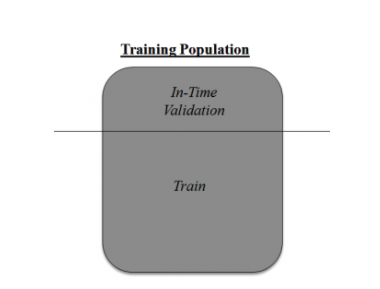